<a href="https://colab.research.google.com/github/Wangwei1111111/Course_arrangement_System/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment1**

In [ ]:
import pandas as pd
import numpy as np

**Q3**

**(a)** Download the Iris data set

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

In [ ]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


**(b)** Standardization: Subtract the mean and divide by the standard deviation of each attribute value

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(data=x_std, columns=iris.feature_names)
x_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:
x_std.mean()

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

In [ ]:
x_std.var()

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

**(c)** Covariance matrix

In [ ]:
cov_matrix = x_std.cov()
cov_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.118359,0.877604,0.823431
sepal width (cm),-0.118359,1.006711,-0.431316,-0.368583
petal length (cm),0.877604,-0.431316,1.006711,0.969328
petal width (cm),0.823431,-0.368583,0.969328,1.006711


**(d)** Factorize the covariance matrix using singular value decomposition and obtain the eigenvalues and eigenvector

In [ ]:
U, s, Vt = np.linalg.svd(cov_matrix)
U

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [ ]:
s

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
Vt

array([[-0.52106591,  0.26934744, -0.5804131 , -0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [ ]:
eigenvalues = s ** 2
eigenvalues

array([8.63234376e+00, 8.46703451e-01, 2.18276457e-02, 4.34883568e-04])

In [ ]:
eigenvectors = U
eigenvectors

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

**(e)** Project the data onto its first two principal components and plot the result

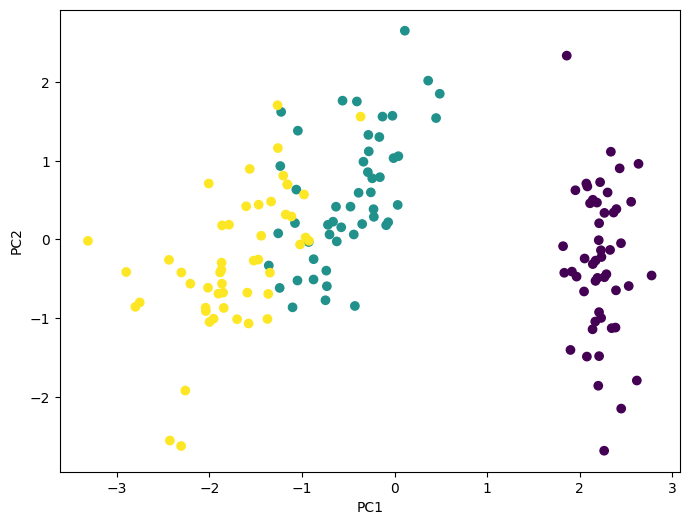

In [ ]:
import matplotlib.pyplot as plt

x_project = np.dot(x_std, U[:, :2])

plt.figure(figsize=(8,6))
plt.scatter(x_project[:, 0], x_project[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Q4**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

**(a)** Bayes' LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_pred = lda.predict(x_test)
lda_accuracy = accuracy_score(y_test, lda_pred)

lda_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9666666666666667

**(b)** KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Text(0, 0.5, 'testing accuracy')

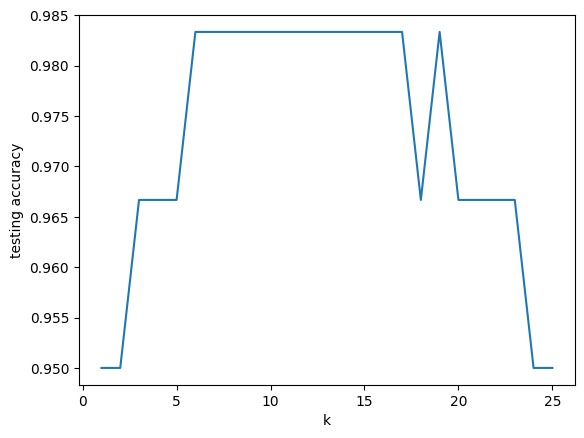

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# to find a best k value, we try k=1 through k=25 and record testing accuracy
k_range = list(range(1,26))
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  knn_pred = knn.predict(x_test)
  scores.append(accuracy_score(y_test,knn_pred))

plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('testing accuracy')

as we can see, the best value of k is 11

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

knn_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9833333333333333

**(c)** compare

We can compare the accuracy of this two classifiers.